In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('dataset_ms2_c_reduced.csv')
data = data.drop(columns=['Index', 'Name', 'Ref', 'Ref_index'])
data

,Z,Period,Group,EN,CR,CM_type,CM_morph,MS2_morph,CP_morph,SSA,C,Cation,Anion,PW,CD,Cs
0,23,4,5,1.63,1.44,0,0,nanosheets,0,5.5,6.0,K,OH,0.5,1.0,152.0
1,23,4,5,1.63,1.44,0,0,nanosheets,0,5.5,6.0,K,OH,0.5,2.0,145.0
2,23,4,5,1.63,1.44,0,0,nanosheets,0,5.5,6.0,K,OH,0.5,5.0,136.0
3,23,4,5,1.63,1.44,0,0,nanosheets,0,5.5,6.0,K,OH,0.5,10.0,120.0
4,23,4,5,1.63,1.44,0,0,nanosheets,0,5.5,6.0,K,OH,0.5,15.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,74,6,6,1.70,1.50,CNF,1D fibers,flower-like clusters,supported,10.8,1.0,K,OH,0.5,1.0,600.0
578,74,6,6,1.70,1.50,CNF,1D fibers,flower-like clusters,supported,10.8,1.0,K,OH,0.5,2.0,527.0
579,74,6,6,1.70,1.50,CNF,1D fibers,flower-like clusters,supported,10.8,1.0,K,OH,0.5,4.0,476.0
580,74,6,6,1.70,1.50,CNF,1D fibers,flower-like clusters,supported,10.8,1.0,K,OH,0.5,8.0,391.0


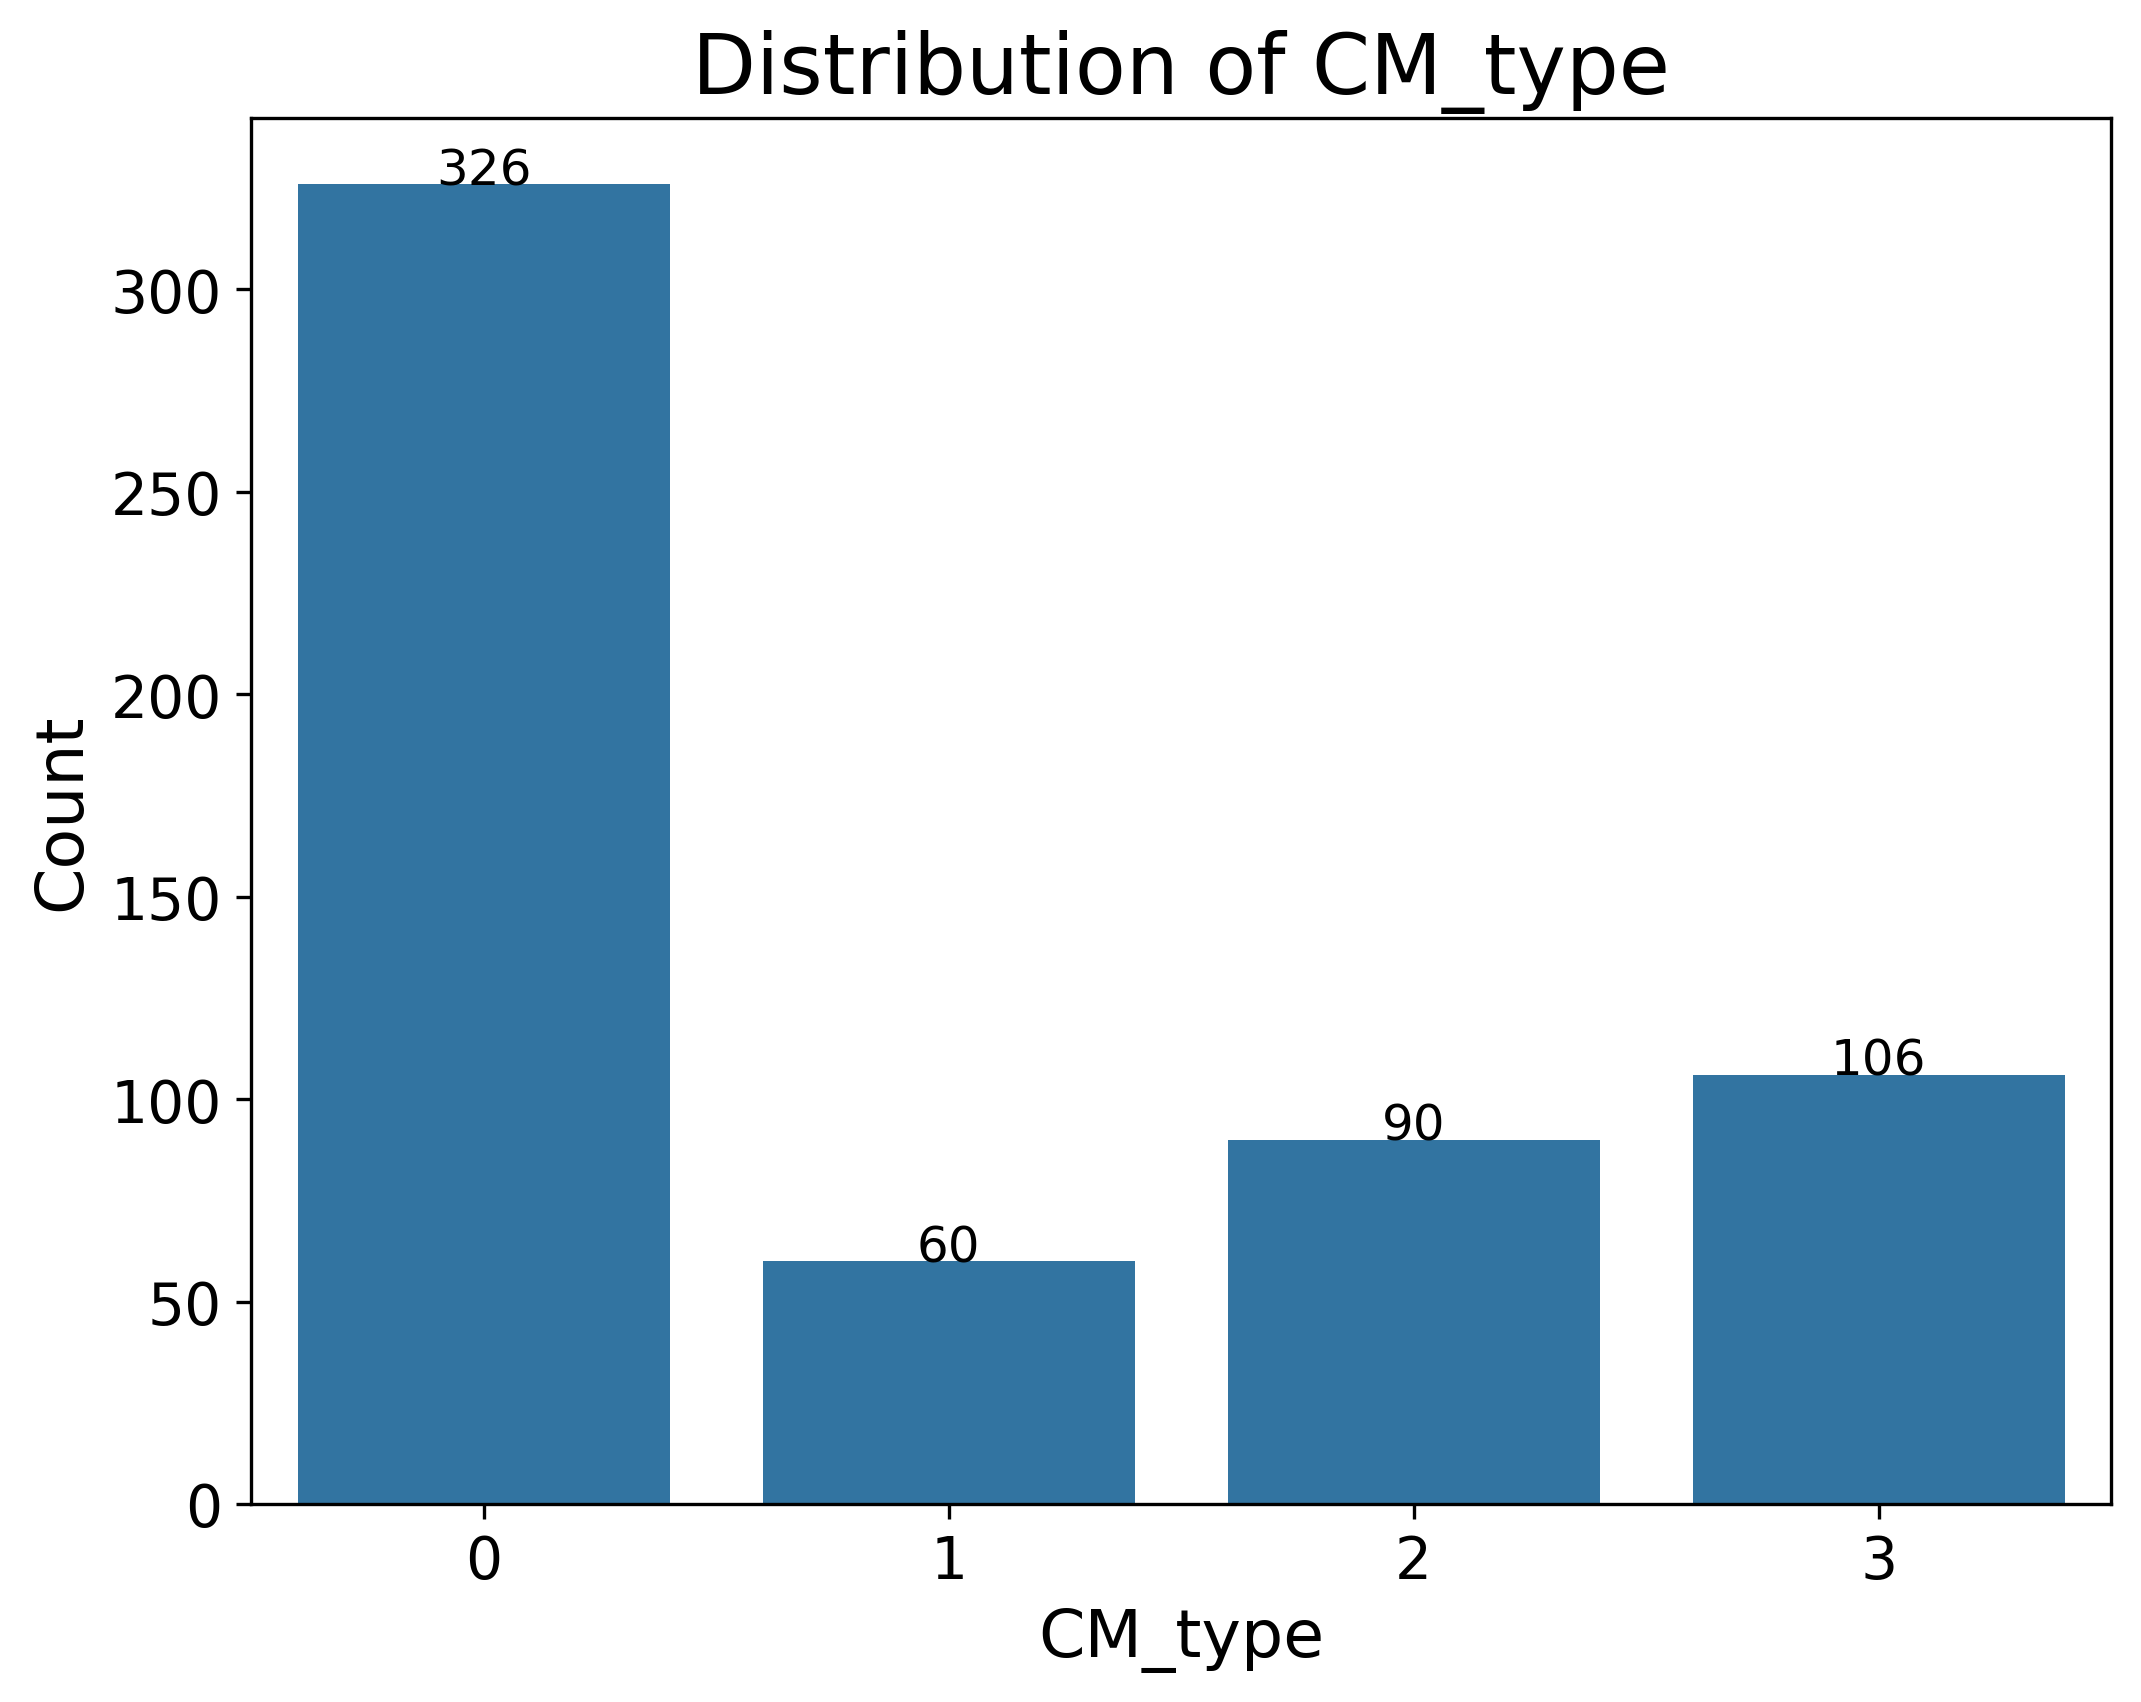

In [2]:
# CM_type column
    # 0. NoCP
    # means pure MS2
    # 1. 1D CNF/CNT
    # includes CNF, CC, CNT and MWCNT.
    # 2. 2D G-based
    # includes Graphene, GO and RGO.
    # 3. 3D derived carbon-based
    # such carbon is obtained by carbonization of organic precursors.
    
replace_values = ['CNF', 'CC', 'CNT', 'MWCNT']
data['CM_type'] = data['CM_type'].replace(replace_values, '1')

replace_values = ['Graphene', 'GO', 'RGO']
data['CM_type'] = data['CM_type'].replace(replace_values, '2')

replace_values = ['derived carbon', 'derived carbon & CNT']
data['CM_type'] = data['CM_type'].replace(replace_values, '3')

# Plot the bar chart with larger font size
plt.figure(figsize=(8, 6), dpi=300)
barplot = sns.barplot(x=data['CM_type'].value_counts().sort_index().index, y=data['CM_type'].value_counts().sort_index().values)
plt.title('Distribution of CM_type', fontsize=20)
plt.xlabel('CM_type', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

for index, value in enumerate(data['CM_type'].value_counts().sort_index().values):
    barplot.text(index, value, value, color='black', ha="center", fontsize=12)

plt.show()


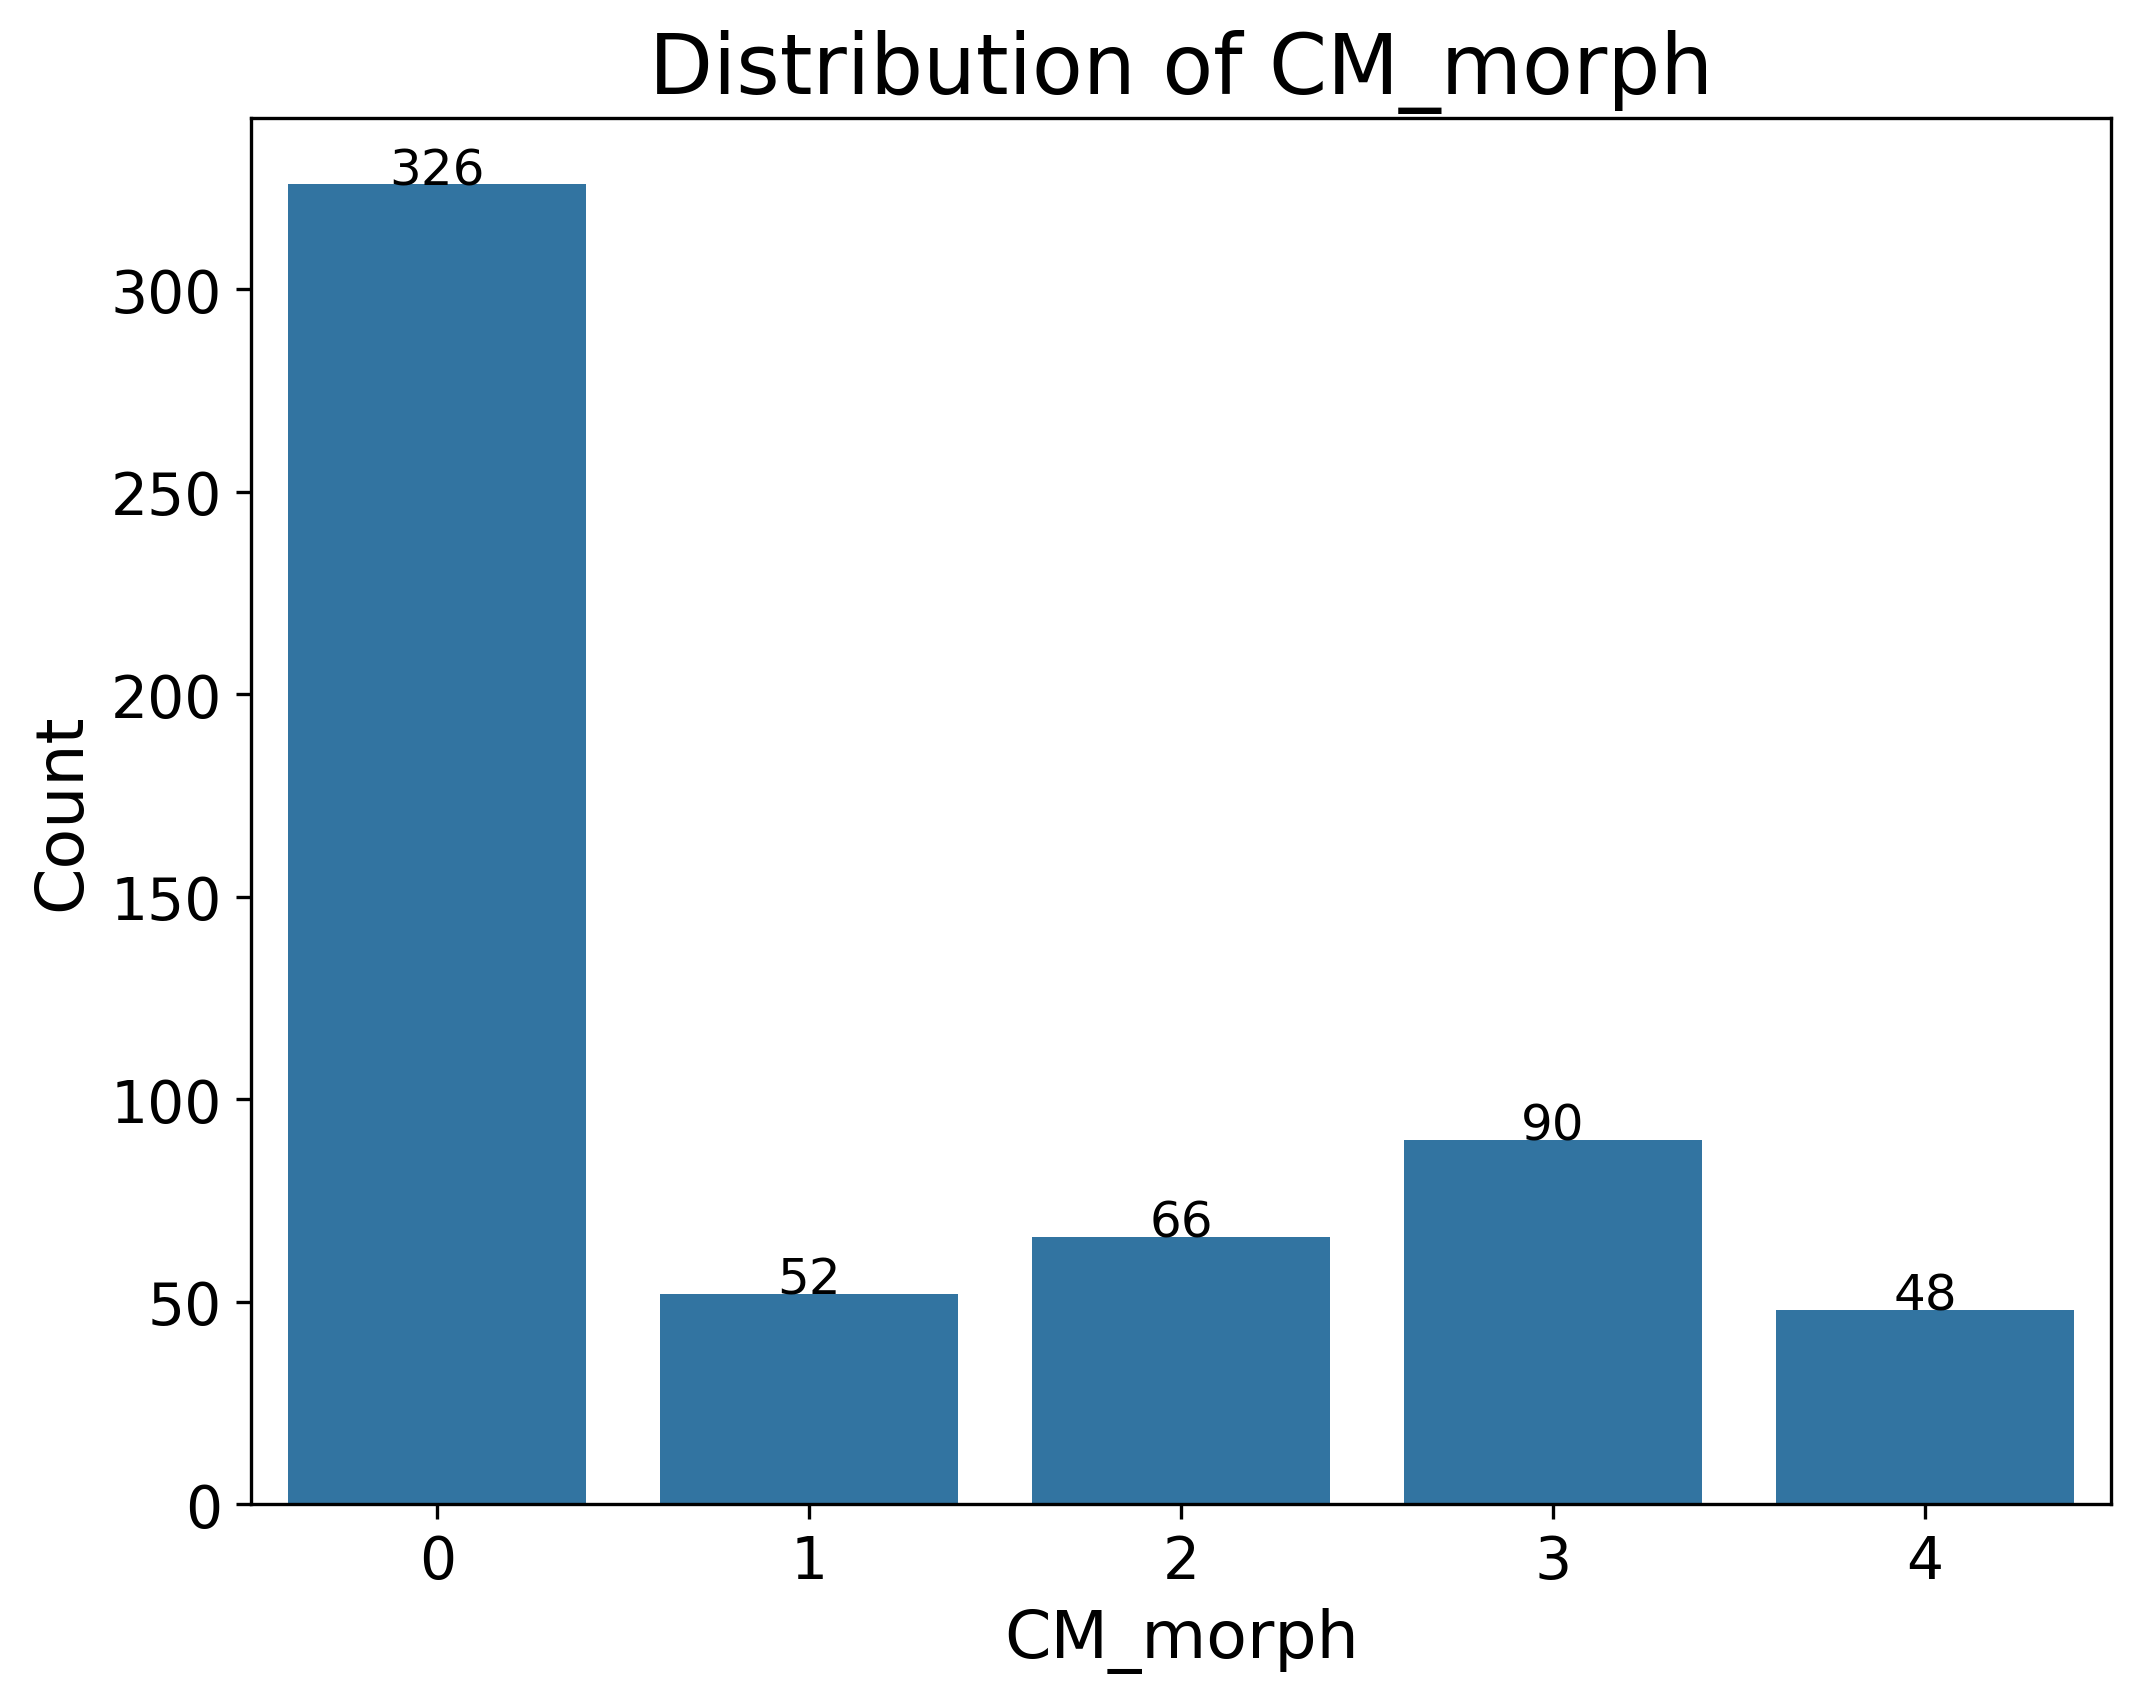

In [3]:
# CM_morph column
    # 0. NoCP
    # means pure MS2
    # 1. 1D fibers & tubes.
    # includes 1D fibers and 1D tubes.
    # 2. 2D
    # includes 2D nanosheets (few layers, thick < 10 nm).
    # 3. 3D porous
    # includes 3D porous and 3D networks.
    # 4. 3D special
    # includes nanoparticles, nanospheres, rods, tubes and flower-like.
    
replace_values = ['1D fibers', '1D tubes']
data['CM_morph'] = data['CM_morph'].replace(replace_values, '1')

replace_values = ['2D nanosheets']
data['CM_morph'] = data['CM_morph'].replace(replace_values, '2')

replace_values = ['3D porous', '3D networks']
data['CM_morph'] = data['CM_morph'].replace(replace_values, '3')

replace_values = ['nanoparticles', 'nanospheres', 'rods', 'tubes', 'flower-like']
data['CM_morph'] = data['CM_morph'].replace(replace_values, '4')

# Plot the bar chart with larger font size
plt.figure(figsize=(8, 6), dpi=300)
barplot = sns.barplot(x=data['CM_morph'].value_counts().sort_index().index, y=data['CM_morph'].value_counts().sort_index().values)
plt.title('Distribution of CM_morph', fontsize=20)
plt.xlabel('CM_morph', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

for index, value in enumerate(data['CM_morph'].value_counts().sort_index().values):
    barplot.text(index, value, value, color='black', ha="center", fontsize=12)
    
plt.show()

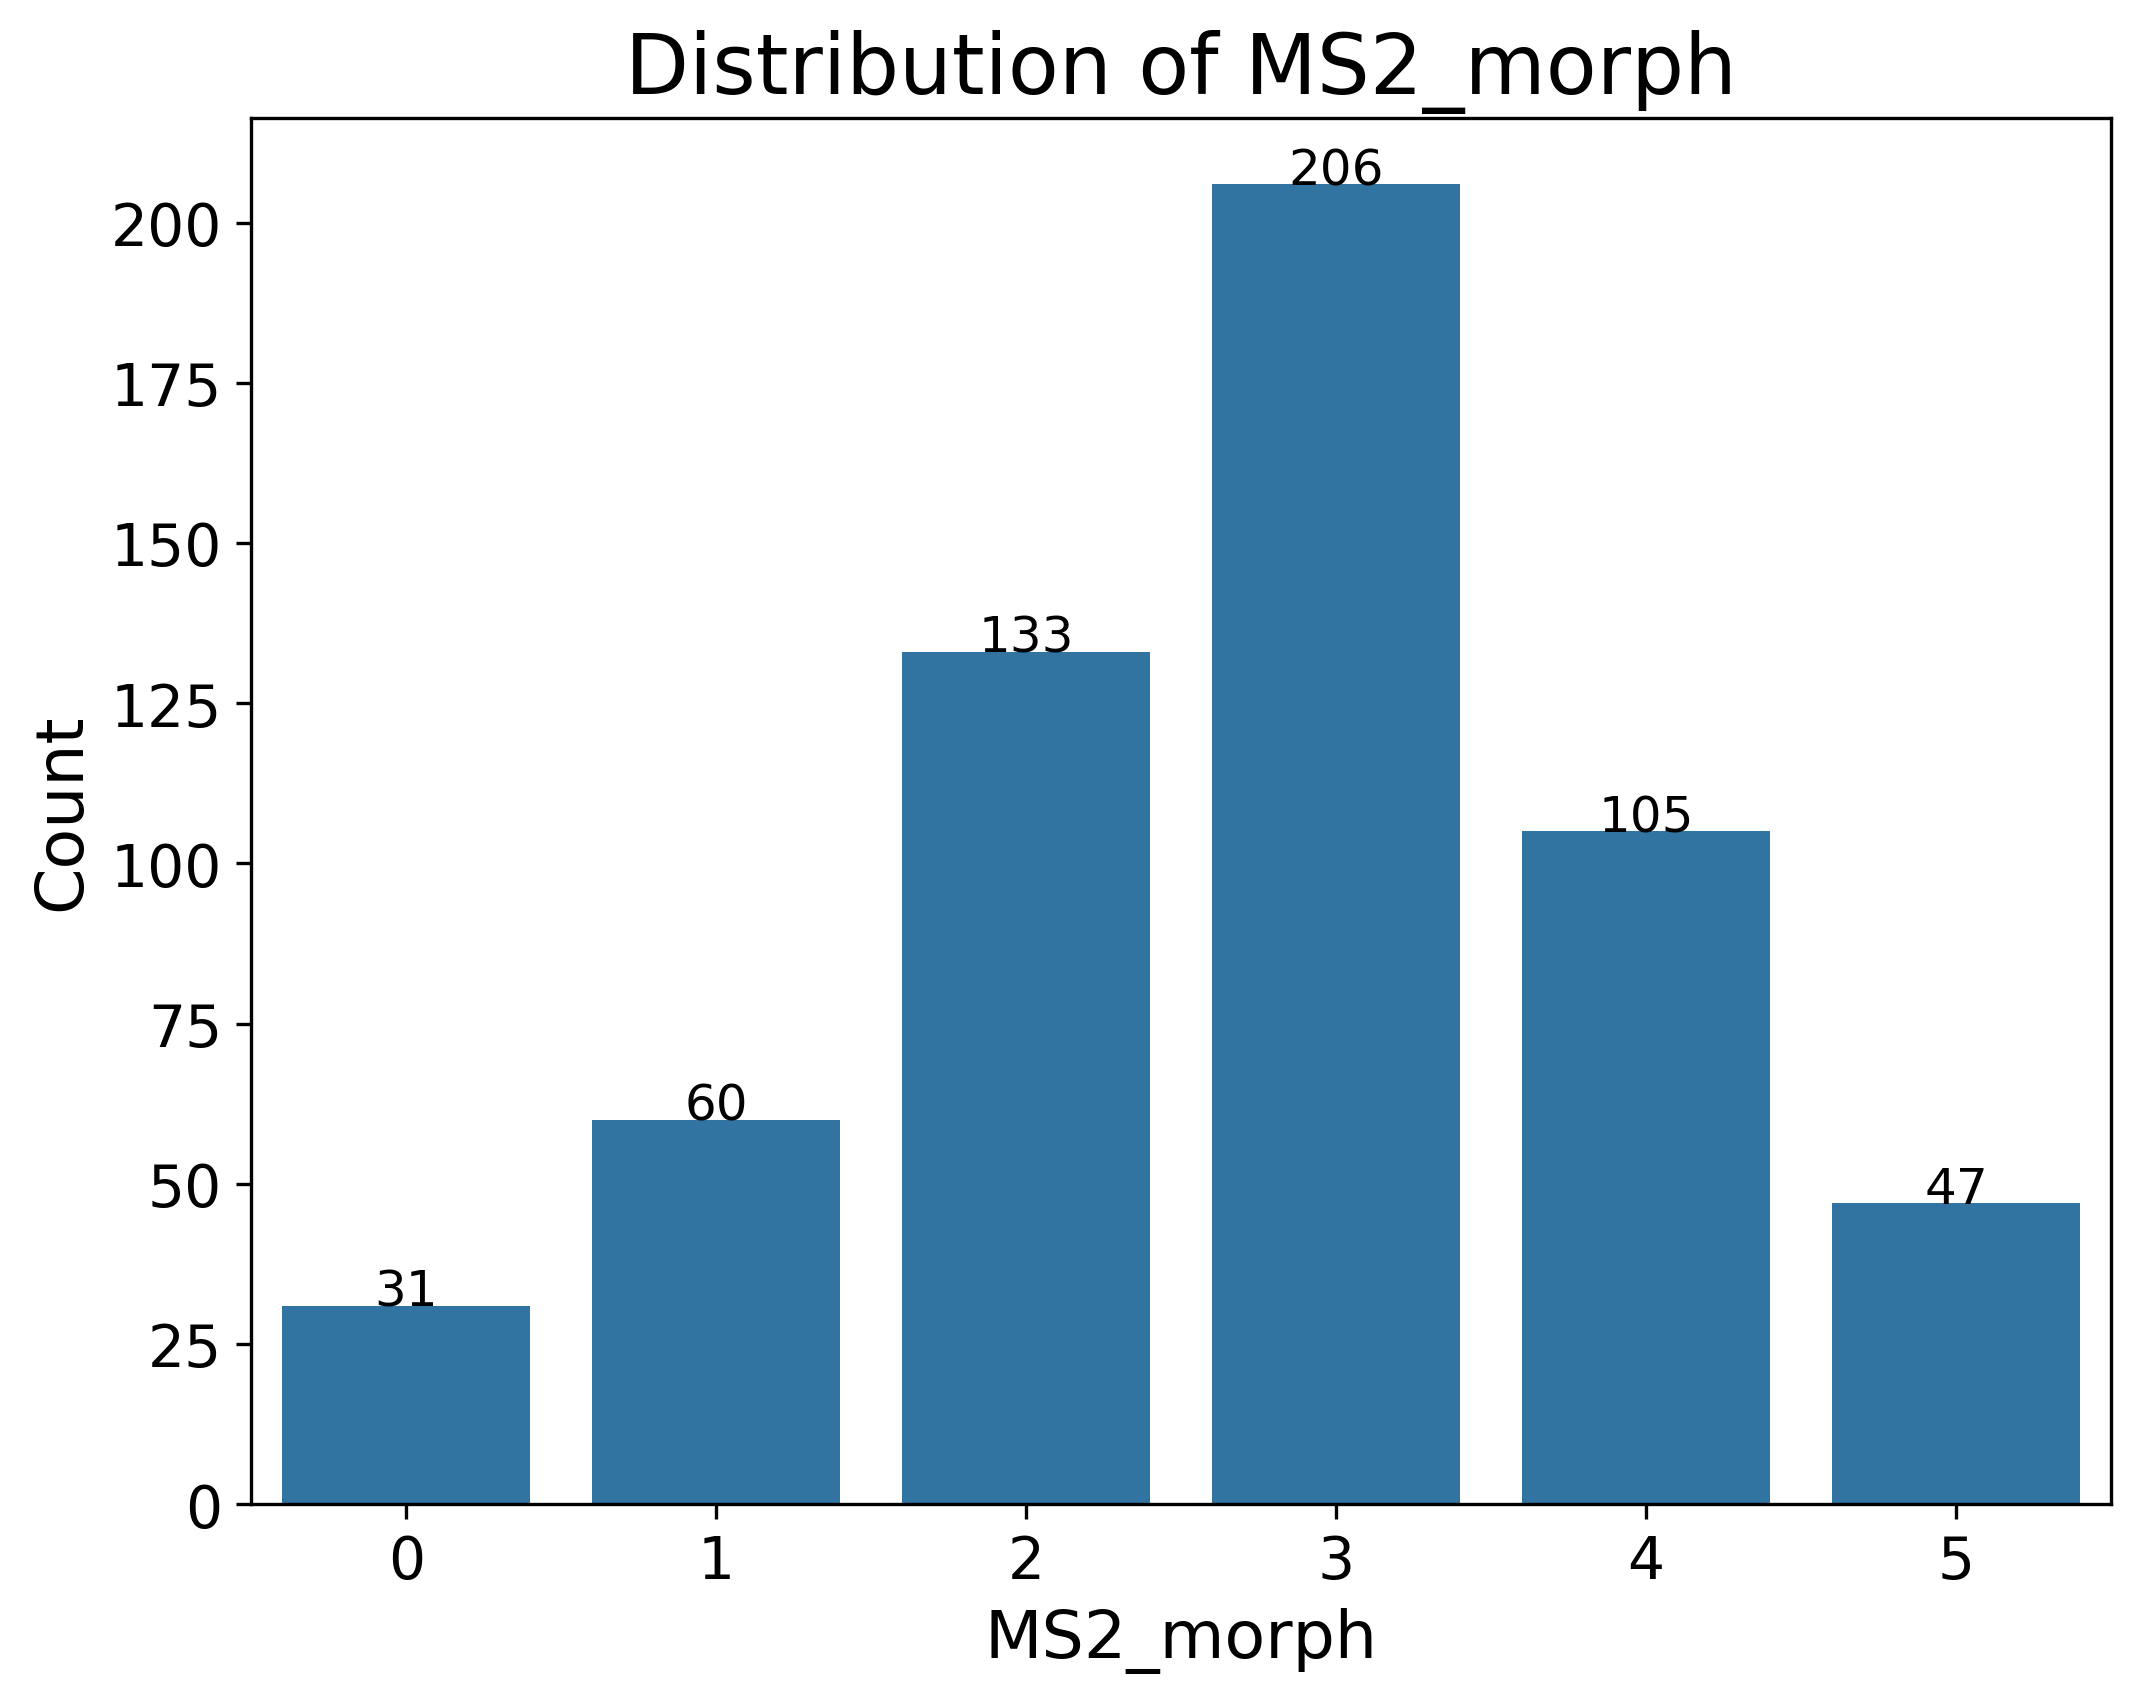

In [4]:
# MS2_morph column
    # 0. bulk
    # no regular shape.
    # 1. nanosheets
    # flake，not few-layer sheet.
    # 2. flower-like clusters
    # aggregated from few-layer nanosheets.
    # 3. irregular nanoparticles
    # particles less than 1 μm in size, but the size and dispersion degree are not uniform.
    # 4. nanoparticles
    # includes nanoparticles, octahedron, cubes, rods and spheres. 
    # the size and dispersion are uniform.
    # 5. hollow morph
    # includes hollow spheres, hollow rods, hollow cubes, hollow nanoparticles,
    # double shell spheres and yolk-shell spheres. 
    
replace_values = ['bulk']
data['MS2_morph'] = data['MS2_morph'].replace(replace_values, '0')

replace_values = ['nanosheets']
data['MS2_morph'] = data['MS2_morph'].replace(replace_values, '1')

replace_values = ['flower-like clusters']
data['MS2_morph'] = data['MS2_morph'].replace(replace_values, '2')

replace_values = ['irregular nanoparticles']
data['MS2_morph'] = data['MS2_morph'].replace(replace_values, '3')

replace_values = ['nanoparticles', 'octahedron', 'cubes', 'rods', 'spheres']
data['MS2_morph'] = data['MS2_morph'].replace(replace_values, '4')

replace_values = ['hollow spheres', 'hollow rods', 'hollow cubes', 'hollow nanoparticles', 'double shell spheres', 'yolk-shell spheres']
data['MS2_morph'] = data['MS2_morph'].replace(replace_values, '5')

# Plot the bar chart with larger font size
plt.figure(figsize=(8, 6), dpi=300)
barplot = sns.barplot(x=data['MS2_morph'].value_counts().sort_index().index, y=data['MS2_morph'].value_counts().sort_index().values)
plt.title('Distribution of MS2_morph', fontsize=20)
plt.xlabel('MS2_morph', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

for index, value in enumerate(data['MS2_morph'].value_counts().sort_index().values):
    barplot.text(index, value, value, color='black', ha="center", fontsize=12)
    
plt.show()

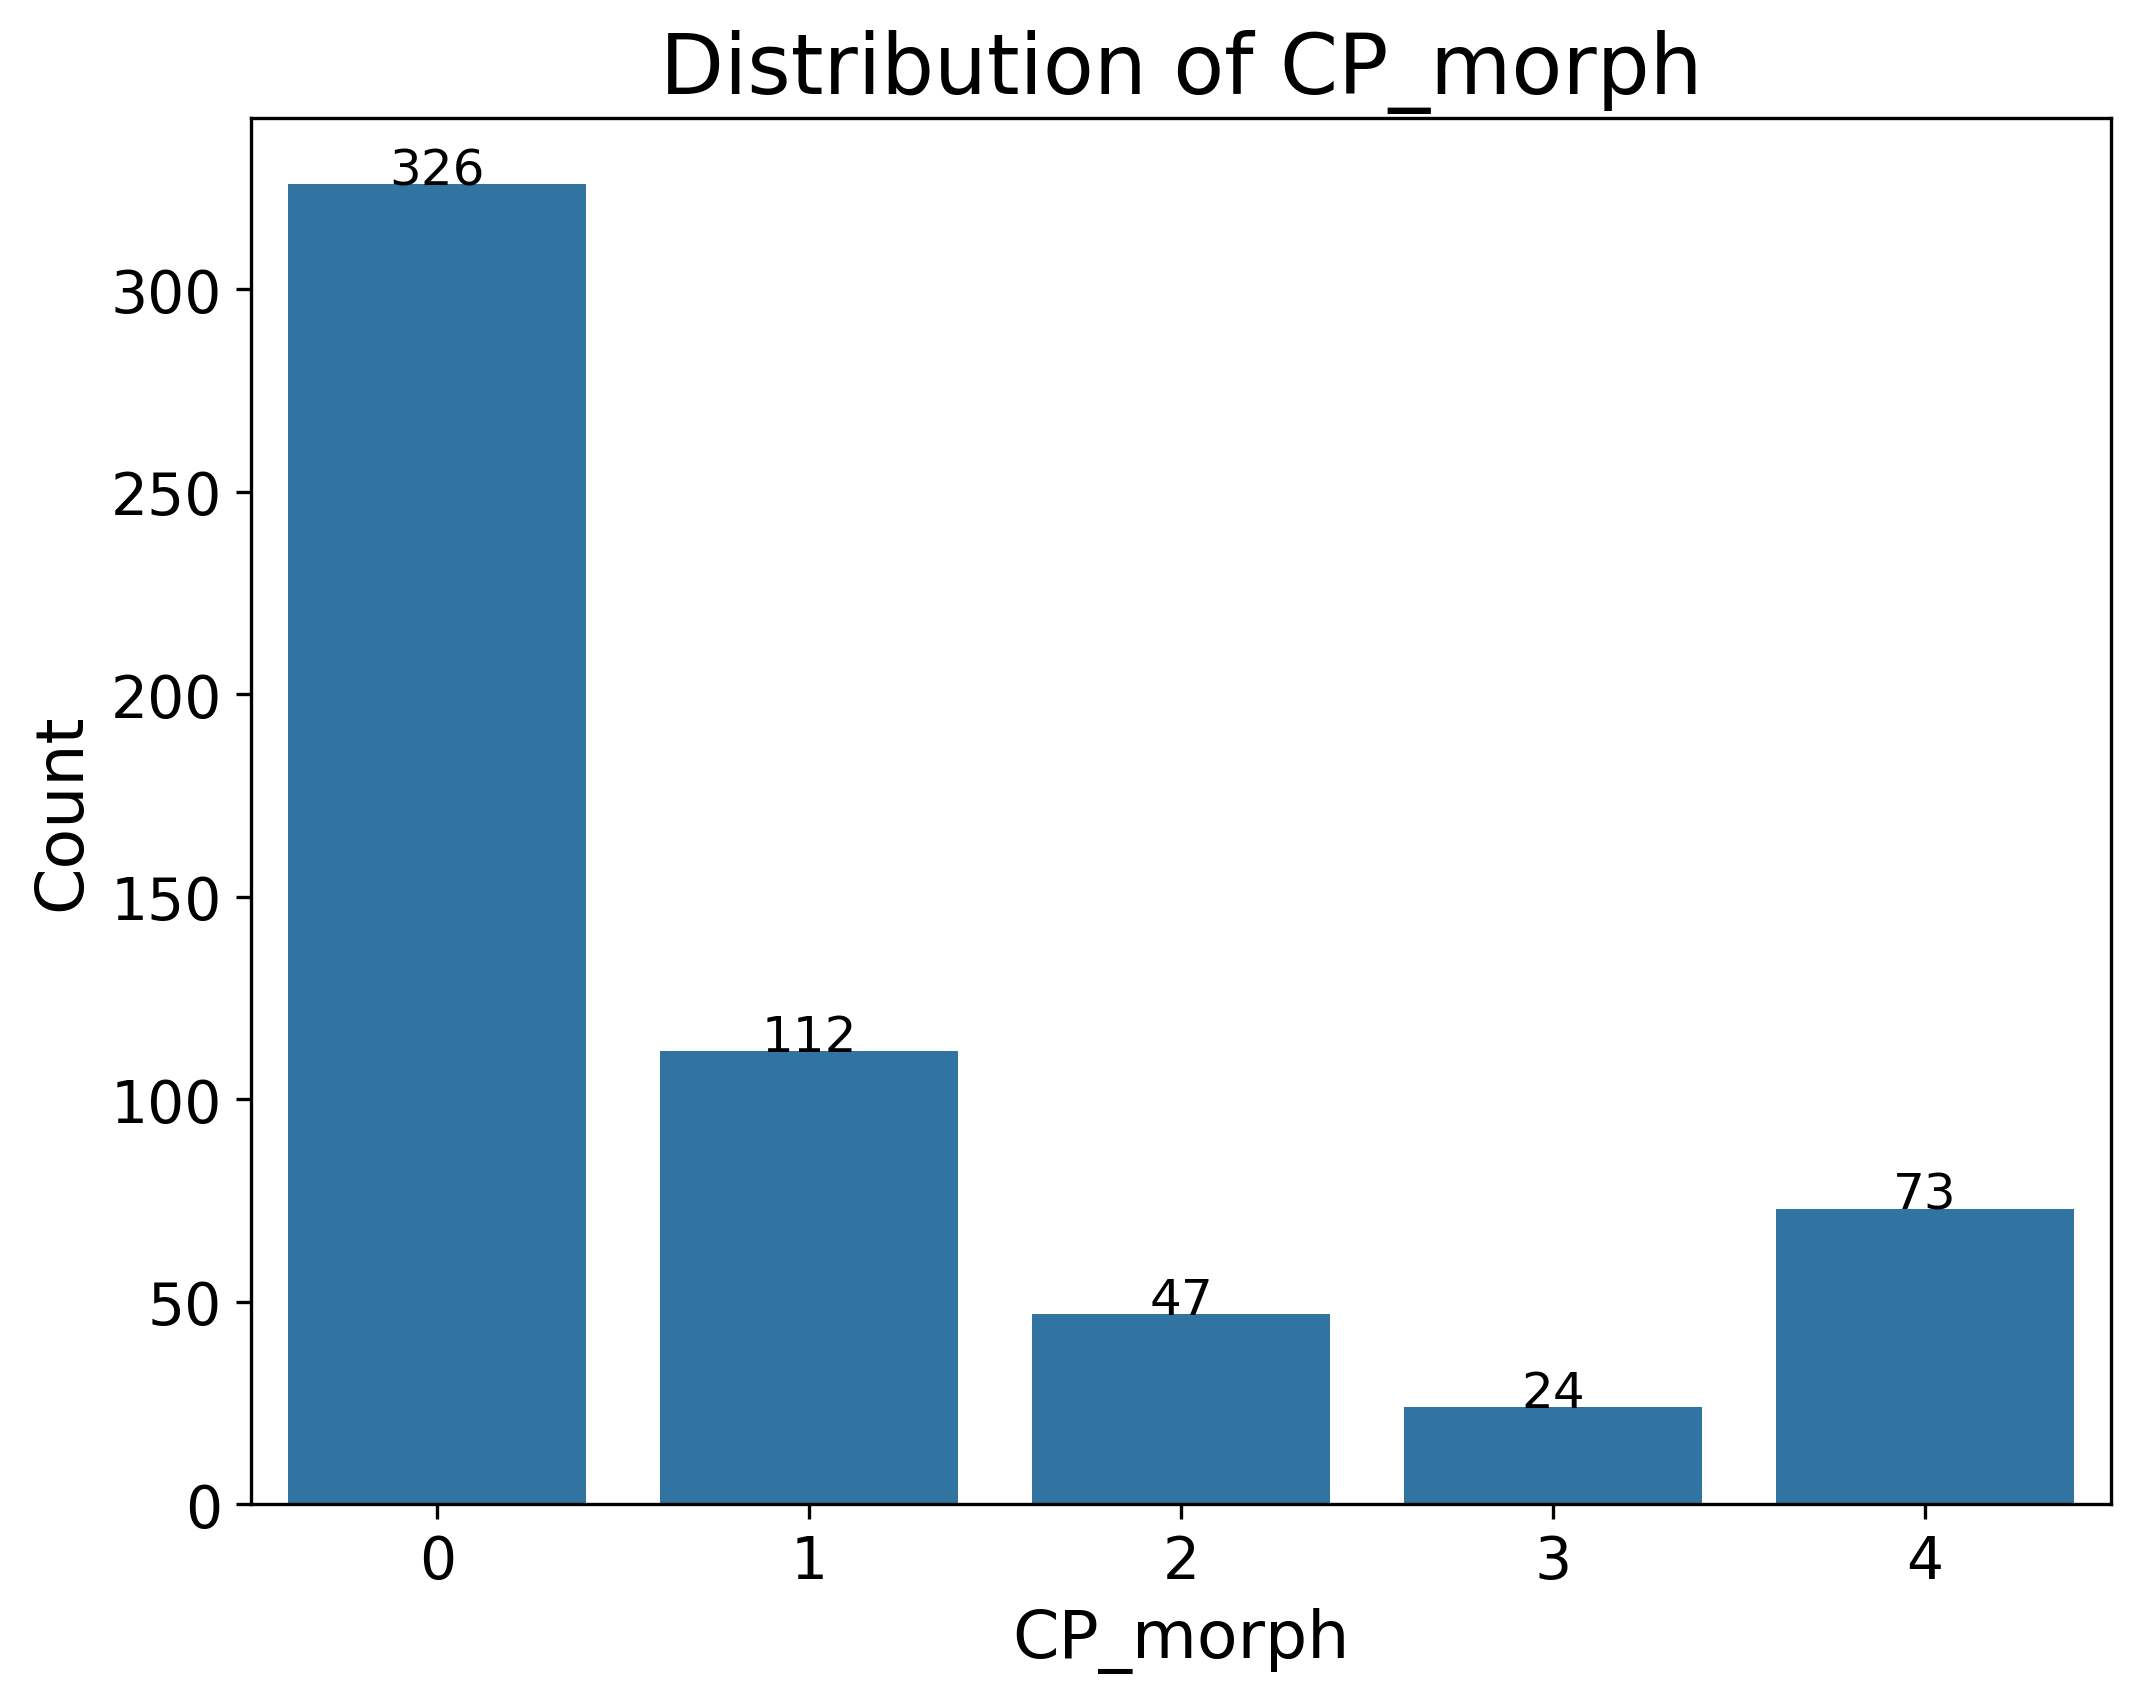

In [5]:
# CP_morph column
    # 0. NoCP
    # 1. supported
    # 2. embedded
    # 3. coated
    # 4. interconnected
    
replace_values = ['supported']
data['CP_morph'] = data['CP_morph'].replace(replace_values, '1')

replace_values = ['embedded']
data['CP_morph'] = data['CP_morph'].replace(replace_values, '2')

replace_values = ['coated']
data['CP_morph'] = data['CP_morph'].replace(replace_values, '3')

replace_values = ['interconnected']
data['CP_morph'] = data['CP_morph'].replace(replace_values, '4')

# Plot the bar chart with larger font size
plt.figure(figsize=(8, 6), dpi=300)
barplot = sns.barplot(x=data['CP_morph'].value_counts().sort_index().index, y=data['CP_morph'].value_counts().sort_index().values)
plt.title('Distribution of CP_morph', fontsize=20)
plt.xlabel('CP_morph', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for index, value in enumerate(data['CP_morph'].value_counts().sort_index().values):
    barplot.text(index, value, value, color='black', ha="center", fontsize=12)  
    
plt.show()

In [6]:
data.to_csv('dataset_reduced_num.csv', index=False)

In [7]:
# 设置图表风格和字体大小
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale=1.5)

# 创建一个图形对象，并将其分成1行2列
plt.figure(figsize=(20, 8), dpi=600)

# 绘制 'SSA' 列的箱线图
plt.subplot(1, 2, 1)
sns.boxplot(data['SSA'])
plt.title('Boxplot of SSA', fontsize=32)
plt.xlabel('SSA', fontsize=28)
plt.grid(True)

# 绘制 'SSA' 列的直方图
plt.subplot(1, 2, 2)
sns.histplot(data['SSA'], kde=True, bins=30)
plt.title('Distribution of SSA', fontsize=32)
plt.xlabel('SSA', fontsize=28)
plt.ylabel('Frequency', fontsize=28)
plt.grid(True)

# 调整布局
plt.tight_layout()
plt.show()

In [8]:
# 设置图表风格和字体大小
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale=1.5)

# 创建一个图形对象，并将其分成1行2列
plt.figure(figsize=(20, 8), dpi=600)

# 绘制 'Cs' 列的箱线图
plt.subplot(1, 2, 1)
sns.boxplot(data['Cs'])
plt.title('Boxplot of Target Variable: Cs', fontsize=32)
plt.xlabel('Cs', fontsize=28)
plt.grid(True)

# 绘制 'Cs' 列的直方图
plt.subplot(1, 2, 2)
sns.histplot(data['Cs'], kde=True, bins=30)
plt.title('Distribution of Target Variable: Cs', fontsize=32)
plt.xlabel('Cs', fontsize=28)
plt.ylabel('Frequency', fontsize=28)
plt.grid(True)

# 调整布局
plt.tight_layout()
plt.show()

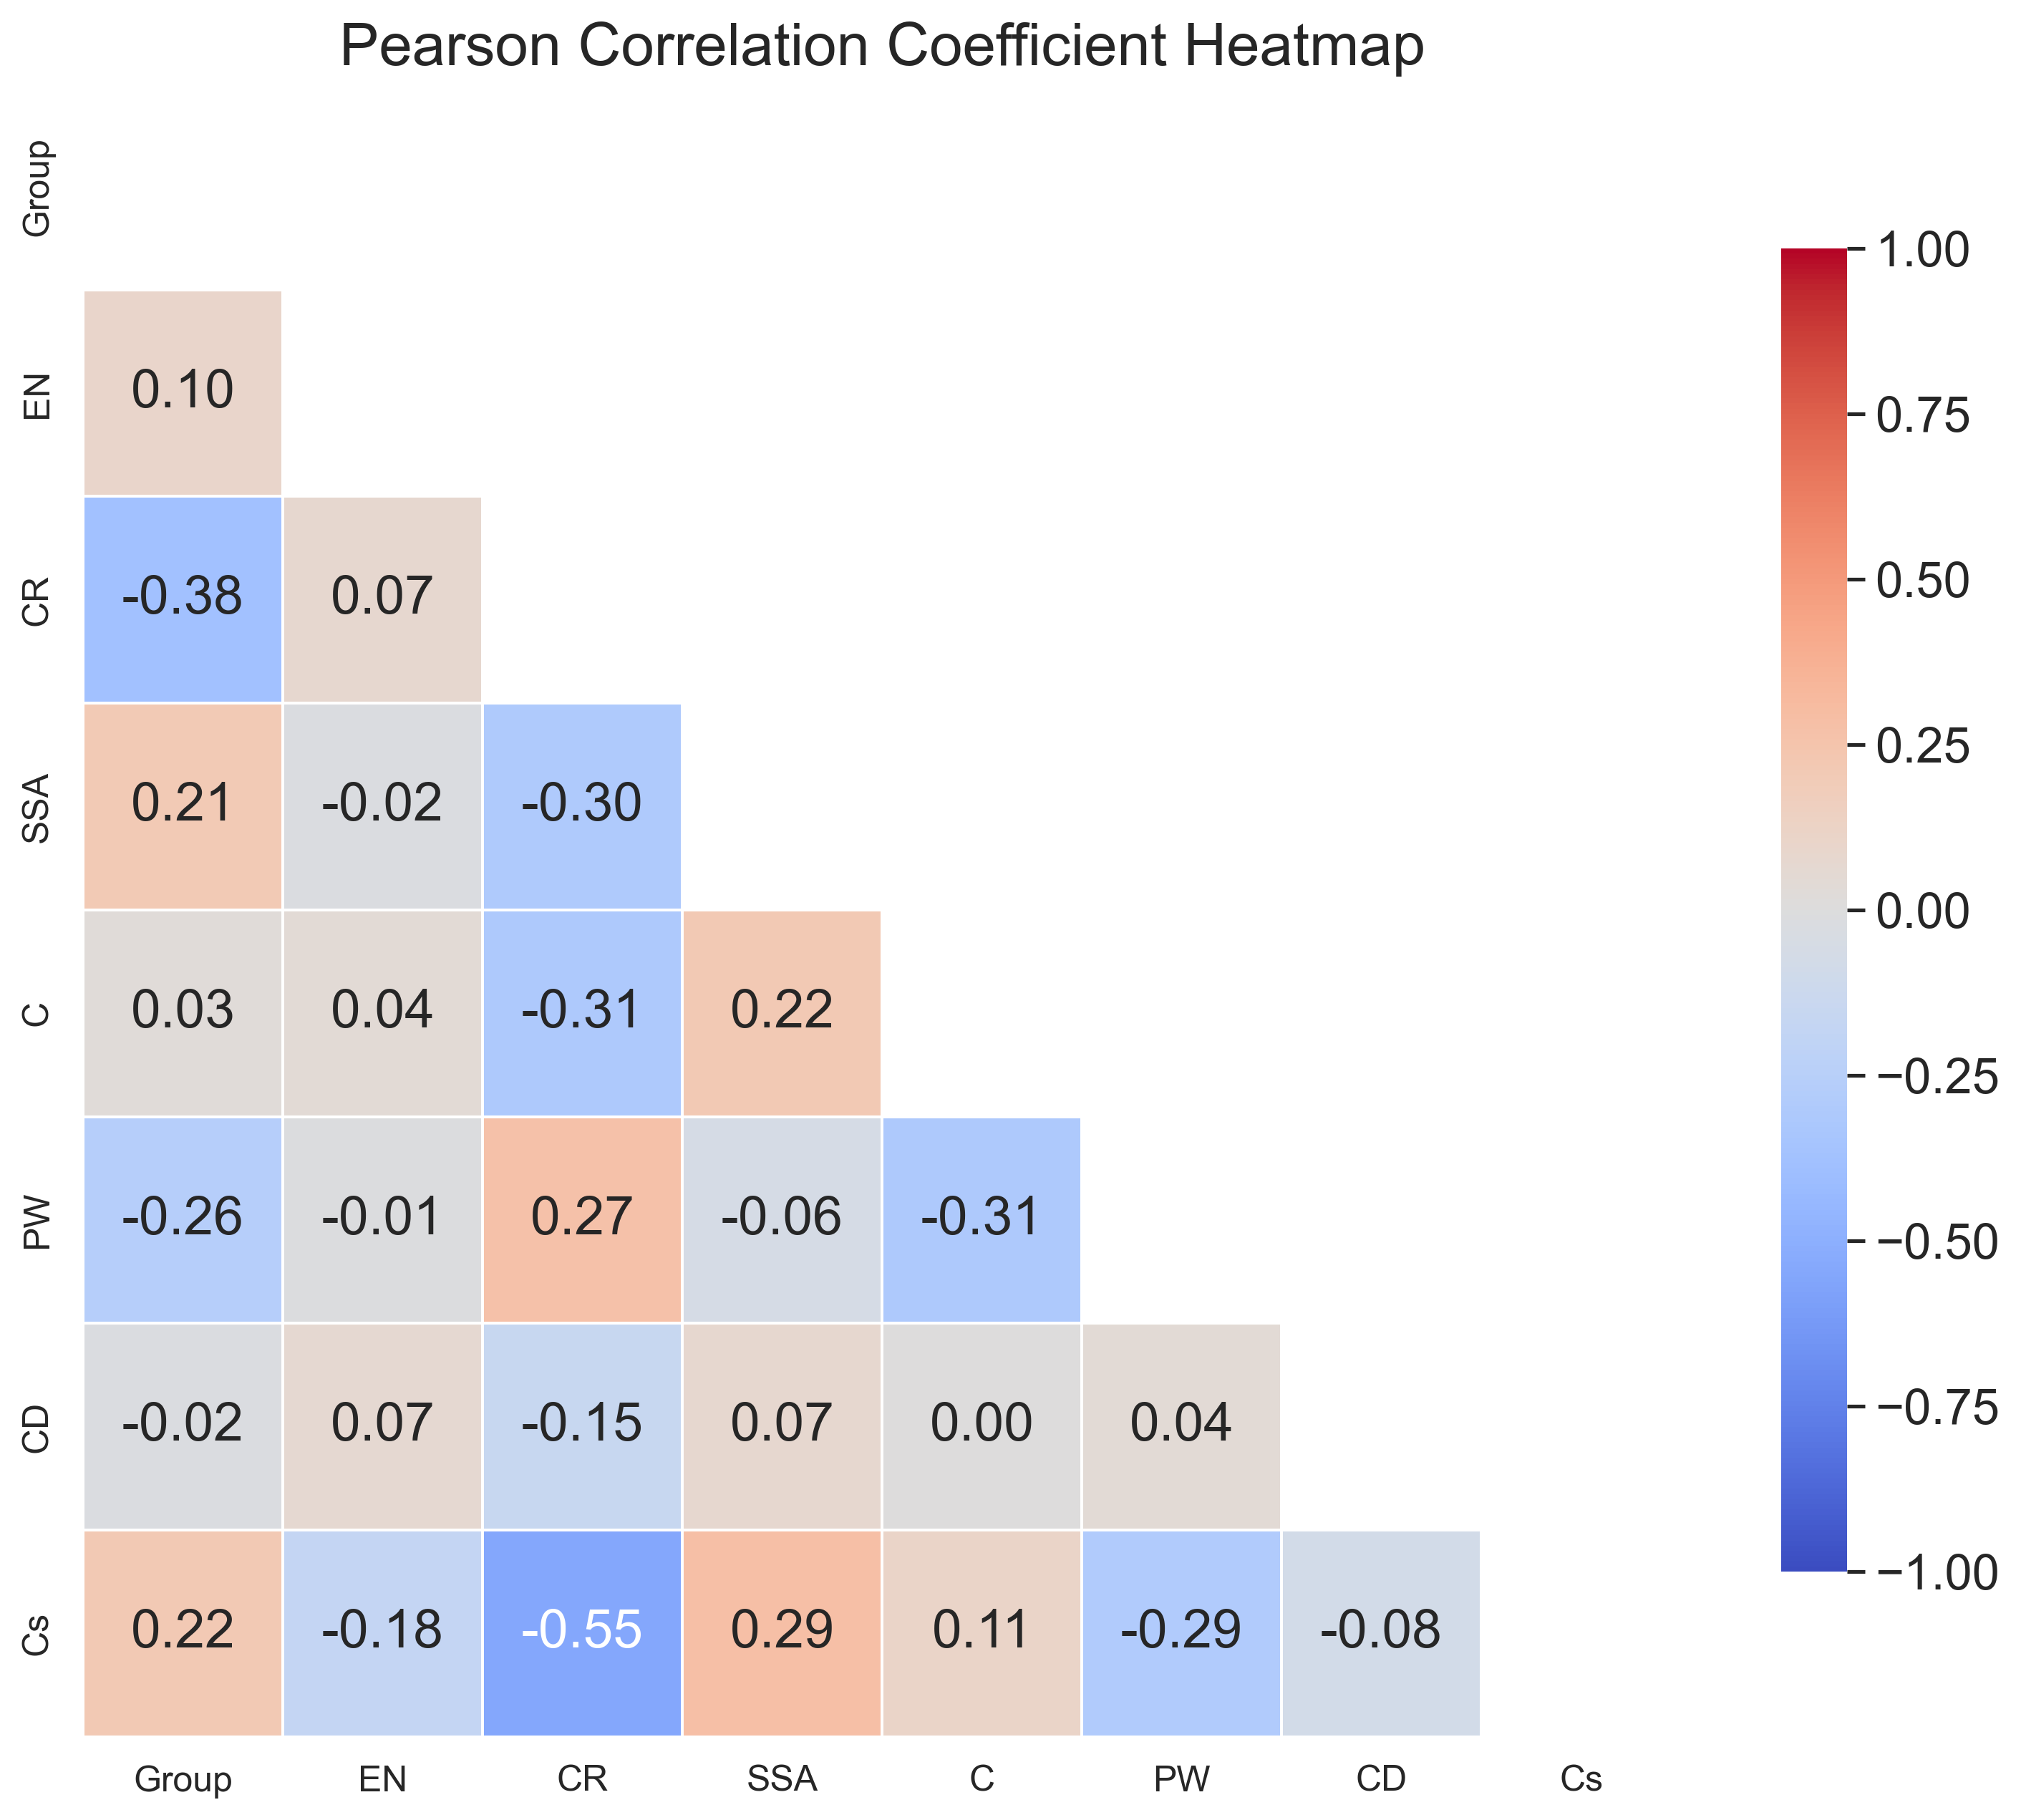

In [15]:
# 计算相关系数矩阵
import numpy as np

data_corr = data.drop(columns=['Z', 'Period', 'CM_type', 'CM_morph', 'MS2_morph', 'CP_morph', 'Anion', 'Cation'])
corr_matrix = data_corr.corr()

# 生成一个掩码，用于隐藏上三角
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 设置图表风格和大小
plt.figure(figsize=(12, 10), dpi=300)
sns.set_style('white')

# 绘制热力图
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8}, linewidths=0.5, vmin=-1, vmax=1)

# 设置标题和标签
plt.title('Pearson Correlation Coefficient Heatmap', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 显示图表
plt.show()